### Day 6: Working with Strings and using resampling methods

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Load dataset and set index col as Date/Time

In [2]:
weather_2012 = pd.read_csv('weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_2012[:5]

Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
Date/Time                                                        
2012-01-01 00:00:00      -1.8                -3.9           86   
2012-01-01 01:00:00      -1.8                -3.7           87   
2012-01-01 02:00:00      -1.8                -3.4           89   
2012-01-01 03:00:00      -1.5                -3.2           88   
2012-01-01 04:00:00      -1.5                -3.3           88   

                     Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)  \
Date/Time                                                                
2012-01-01 00:00:00                4              8.0           101.24   
2012-01-01 01:00:00                4              8.0           101.24   
2012-01-01 02:00:00                7              4.0           101.26   
2012-01-01 03:00:00                6              4.0           101.27   
2012-01-01 04:00:00                7              4.8           101.23   

                                  Weather  
Date/Time                                  
2012-01-01 00:00:00                   Fog  
2012-01-01 01:00:00                   Fog  
2012-01-01 02:00:00  Freezing Drizzle,Fog  
2012-01-01 03:00:00  Freezing Drizzle,Fog  
2012-01-01 04:00:00                   Fog

#### Check which rows in the dataset have 'Snow' in the 'Weather' column

In [3]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

#### This returns a binary vector which is not of much use for us

In [4]:
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

#### Let's plot the vector to see in which months it snowed

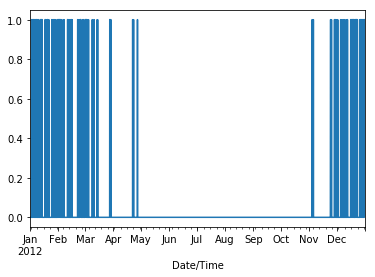

In [5]:
# More useful!
is_snowing.plot()

### Use resampling to find the snowiest month

#### If we wanted the median temperature each month, we could use the resample() method like this:

/home/purveshkatkoria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


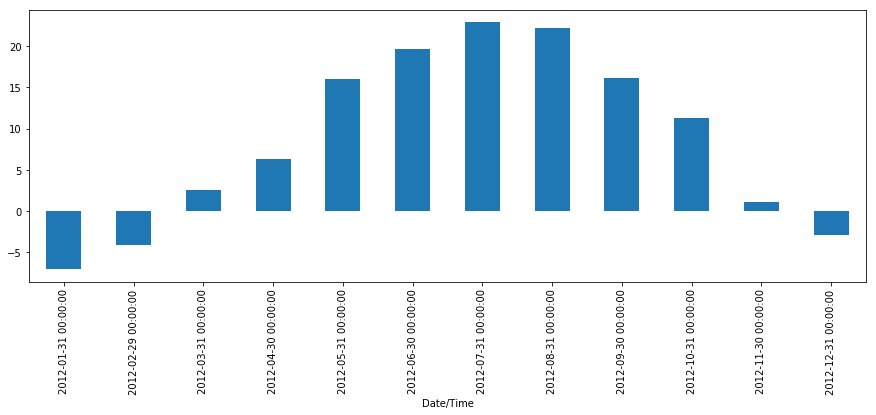

In [7]:
weather_2012['Temp (C)'].resample('M', how=np.median).plot(kind='bar', figsize=(15,5))

#### Converting the vector to 0 and 1 

In [8]:
is_snowing.astype(float)[:10]

Date/Time
2012-01-01 00:00:00    0.0
2012-01-01 01:00:00    0.0
2012-01-01 02:00:00    0.0
2012-01-01 03:00:00    0.0
2012-01-01 04:00:00    0.0
2012-01-01 05:00:00    0.0
2012-01-01 06:00:00    0.0
2012-01-01 07:00:00    0.0
2012-01-01 08:00:00    0.0
2012-01-01 09:00:00    0.0
Name: Weather, dtype: float64

#### Using resample to show what percentage of time it was snowing in the month

In [9]:
is_snowing.astype(float).resample('M', how=np.mean)

/home/purveshkatkoria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

/home/purveshkatkoria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


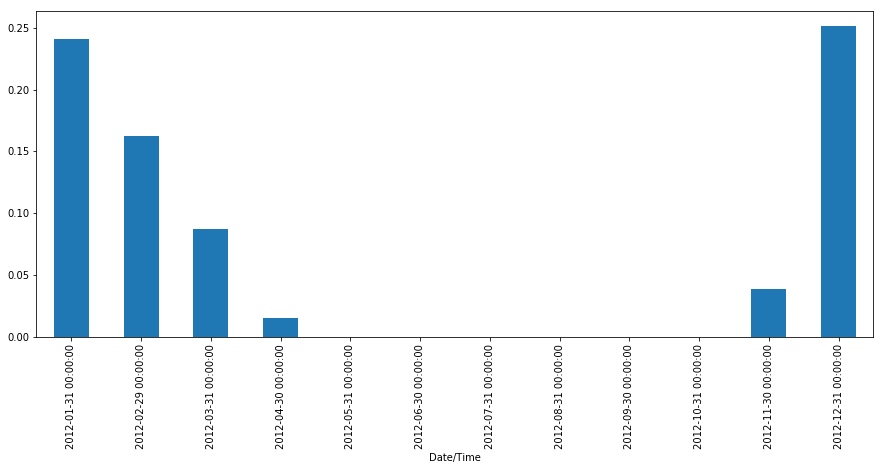

In [11]:
is_snowing.astype(float).resample('M', how=np.mean).plot(kind='bar', figsize=(15,6))

### Plotting temperature and snowiness stats together

#### We can also combine these two statistics (temperature, and snowiness) into one dataframe and plot them together:

In [12]:
temperature = weather_2012['Temp (C)'].resample('M', how=np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M', how=np.mean)

# Name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"

/home/purveshkatkoria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.
/home/purveshkatkoria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  This is separate from the ipykernel package so we can avoid doing imports until


#### We'll use concat again to combine the two statistics into a single dataframe.

In [13]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

Temperature  Snowiness
Date/Time                         
2012-01-31        -7.05   0.240591
2012-02-29        -4.10   0.162356
2012-03-31         2.60   0.087366
2012-04-30         6.30   0.015278
2012-05-31        16.05   0.000000
2012-06-30        19.60   0.000000
2012-07-31        22.90   0.000000
2012-08-31        22.20   0.000000
2012-09-30        16.10   0.000000
2012-10-31        11.30   0.000000
2012-11-30         1.05   0.038889
2012-12-31        -2.85   0.251344

### Using sub plots to plot both of them on separate graphs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fadfb7dd8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f0fadf38978>], dtype=object)

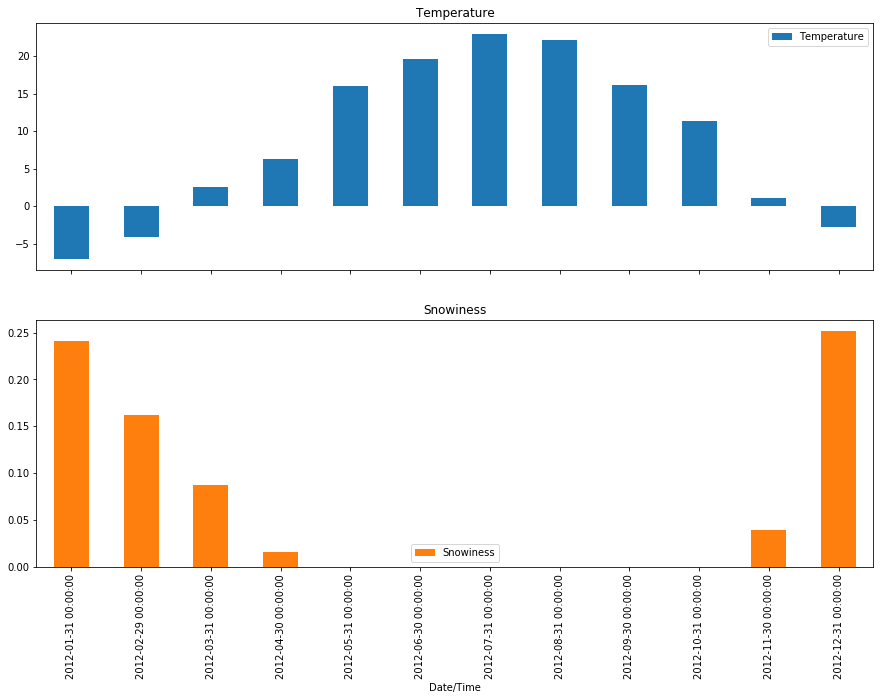

In [14]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))